<img src='images/showwcase.png'>

**image via:** [Showwcase](https://www.showwcase.com/)

<h1 style="color:#353A40U">User Engagement Analysis - Data Analyst @ Showwcase</h1>

- <a href="#import">Import Libraries</a>

- <a href="#gather">Gathering Data</a>
  
- <a href="#assess">Assessing Data </a>
  
  - <a href="#assess_summary">Summary findings</a>
  
- <a href="#clean">Cleaning Data</a>

- <a href="#store">Storing Cleaned Data</a>

- <a href="#Visual">Analyzing and Visualizing Data</a>

<a id='import'></a>
<hr>

## Import Libraries

In [1]:
#prerequisite package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as mtick
import calendar
from IPython.display import display, HTML
%matplotlib inline

<a id='gather'></a>
<hr>

## Gathering Data


In [2]:
#import data from the csv file
showwcase_original = pd.read_csv('Data/showwcase_sessions.csv')
showwcase_original.sample(10)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
170,574792.0,29375.0,10/13/19,True,True,True,True,True,1.0,16.0,4.0,220.0,2.0,2333.0
294,183387.0,29375.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,518.0,0.0,2140.0
8,490096.0,40572.0,10/30/19,True,True,False,False,False,1.0,25.0,0.0,0.0,0.0,290.0
104,243101.0,29375.0,10/20/19,False,False,False,True,True,0.0,0.0,0.0,1109.0,4.0,1115.0
17,889461.0,73524.0,10/28/19,True,True,True,True,False,3.0,10.0,1.0,703.0,0.0,61.0
54,309053.0,32047.0,10/26/19,False,True,False,True,False,0.0,11.0,0.0,360.0,0.0,1492.0
69,854620.0,73524.0,10/24/19,True,False,True,True,True,5.0,0.0,1.0,1281.0,3.0,144.0
158,883587.0,23404.0,10/15/19,True,False,True,False,False,2.0,0.0,2.0,0.0,0.0,1138.0
46,999480.0,23083.0,10/26/19,False,False,True,True,False,0.0,0.0,1.0,1535.0,0.0,695.0
194,889677.0,23404.0,10/11/19,True,True,True,True,True,1.0,1.0,4.0,1757.0,1.0,1408.0


<a id='assess'></a>
<hr>

## Assessing Data

In [3]:
showwcase_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [4]:
showwcase_original.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


In [5]:
print(f"number of unique sessions:{showwcase_original.session_id.nunique()}")

number of unique sessions:300


In [6]:
#checking rows with NaN session_likes_given
showwcase_original[showwcase_original.session_likes_given.isna()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#check for incosistency between likes_given and session_likes_given
showwcase_original[(showwcase_original.session_likes_given != 0)].likes_given.value_counts()

True     213
False      1
Name: likes_given, dtype: int64

In [8]:
#check for incosistency between comment_given and session_comments_given
showwcase_original[(showwcase_original.session_comments_given != 0)].comment_given.value_counts()

True    225
Name: comment_given, dtype: int64

In [9]:
#check for incosistency between bug_occured and bugs_in_session
showwcase_original[(showwcase_original.bugs_in_session != 0)].bug_occured.value_counts()

True    116
Name: bug_occured, dtype: int64

In [10]:
#check for incosistency between projects_added and session_projects_added
showwcase_original[(showwcase_original.session_projects_added != 0)].projects_added.value_counts()

True    227
Name: projects_added, dtype: int64

In [11]:
#check for incosistency between inactive_status and inactive_duration
showwcase_original[(showwcase_original.inactive_duration != 0)].inactive_status.value_counts()

True    172
Name: inactive_status, dtype: int64

<a id='assess_summary'></a>
### `Summery of Assessing`
-  Columns types are not right
- 2 NaN in `login_date`
- 2 NaN in `session_id` and `customer_id`
- 2 NaN in `session_projects_added`
- 3 NaN `session_likes_given`
- 2 NaN in `session_comments_given`
- <font style="color:green">All integer columns' values are >= 0, That's reasonable</font>
- Row #35 has contradiction in columns <font style="color:red"> `likes_given` = False while `session_likes_given` != 0</font>, probably the NaN value seen above
- Redudanancy having boolean columns `projects_added`, `likes_given`, `comment_given`, `inactive_status`and `bug_occured` while their information can be calculated easily when needed from columns `session_projects_added`, `session_likes_given`, `session_comments_given`, `inactive_duration`and `bugs_in_session` consecutively
- column names inconsistent

<a id='clean'></a>
<hr>

## Cleaning Data

In the following part, the three following steps are followed in order to clean each issue, these steps are: <br>
`1.` Define <br>
`2.` Code <br>
`3.` Test <br>

But First of all, Let's keep the original Dataset untouched and do all our cleaninng on a copy of the dataset.

In [12]:
#create a copy of the original dataframe
showwcase_df = showwcase_original.copy()

<hr>

#### `1` Define
From the info() function, we could see that dataset has 302 rows but every column has at max 300 value.<br>
It looks like there're 2 empty rows but let's double check

In [13]:
showwcase_df[showwcase_df.isna().all(1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This maybe a data integrity issue, althought `projects_added`, `likes_given`, `comment_given`, `inactive_status` and `bug occured` = True<br>
But `seesion_id` and `customer_id` and `everything` else = NaN <br>
My Solution is to drop these two rows. 

#### `2` Code



In [14]:
#keeping everything except the empty rows
showwcase_df = showwcase_df[~showwcase_df.isna().all(1)]

#### `3` Test

In [15]:
#checking if the empty rows are deleted
showwcase_df[showwcase_df.isna().all(1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration


<hr>

#### `1` Define
3 nulls in session_likes_given, we got rid of 2. But let's look at the reamaing one

In [16]:
showwcase_df[showwcase_df.session_likes_given.isna()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0


It looks like it's the same row that has the contradiction in the following line

In [17]:
showwcase_df[(showwcase_df.session_likes_given!=0) & (showwcase_df.likes_given == False)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0


<font color=green> The NaN value can be replaced with 0, or it can be replaced with the mean value of session_likes. 
I choose to replace it with the mean value of seesion_likes in order to not miss the original mean value

#### `2` Code


In [18]:
#original mean of session_likes
session_likes_mean_before = showwcase_df.session_likes_given.mean()
print(f"Mean value of Session likes before replacing the NaN value: {session_likes_mean_before}")

Mean value of Session likes before replacing the NaN value: 10.45819397993311


In [19]:
showwcase_df.session_likes_given = showwcase_df.session_likes_given.replace(np.nan, session_likes_mean_before)

#### `3` Test


In [20]:
#check if NaN value is still exist
showwcase_df[showwcase_df.session_likes_given.isna()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration


In [21]:
#mean of session_likes after
session_likes_mean_after = showwcase_df.session_likes_given.mean()
print(f"Mean value of Session likes after replacing the NaN value: {session_likes_mean_after}")

Mean value of Session likes after replacing the NaN value: 10.45819397993311


<hr>

#### `1` Define
Drop the unnecessary columns these are: `projects_added`, `likes_given`, `comment_given`, `inactive_status`, `bug_occured` <br>
The value of these columns can be calculated easily but checking their consecutive columns for values =0 or >0

#### `2` Code

In [22]:
showwcase_df = showwcase_df.drop(columns=['projects_added', 'likes_given', 'comment_given', 'inactive_status', 'bug_occured'], axis=1)

#### `3` Test

In [23]:
showwcase_df.columns

Index(['session_id', 'customer_id', 'login_date', 'session_projects_added',
       'session_likes_given', 'session_comments_given', 'inactive_duration',
       'bugs_in_session', 'session_duration'],
      dtype='object')

<hr>

#### `1` Define
Converting the remaining columns to their correct data types:
- `session_id` and `customer_id` should be <font style="color:green"><b>strings</font><font style="color:red"> <b>not float</font>
- `login_date` should be <font style="color:green"><b>datetime</font> <font style="color:red"><b>not string</font>
- `session_projects_added`, `session_likes_given`, `session_comments_given`, `inactive_duration`, `bugs_in_session` and `session_duration` should be <font style="color:green"><b>integers</font><font style="color:red"> <b>not float</font>

#### `2` Code

In [24]:
#colummns changed to Strings
showwcase_df.session_id = showwcase_df.session_id.astype(int).astype(str)
showwcase_df.customer_id = showwcase_df.customer_id.astype(int).astype(str)

In [25]:
#colummns changed to Datetime and sort the dates ascending order
showwcase_df.login_date = pd.to_datetime(showwcase_df.login_date)
showwcase_df.sort_values(by=['login_date'], inplace=True, ascending=True)

In [26]:
#colummns changed to Integers
showwcase_df.session_projects_added = showwcase_df.session_projects_added.astype(int)
showwcase_df.session_likes_given = showwcase_df.session_likes_given.astype(int)
showwcase_df.session_comments_given = showwcase_df.session_comments_given.astype(int)
showwcase_df.inactive_duration = showwcase_df.inactive_duration.astype(int)
showwcase_df.bugs_in_session = showwcase_df.bugs_in_session.astype(int)
showwcase_df.session_duration = showwcase_df.session_duration.astype(int)

#### `3` Test

In [27]:
#checking the data types
showwcase_df.dtypes

session_id                        object
customer_id                       object
login_date                datetime64[ns]
session_projects_added             int64
session_likes_given                int64
session_comments_given             int64
inactive_duration                  int64
bugs_in_session                    int64
session_duration                   int64
dtype: object

Recheck the final look of the dataset:

In [28]:
#check my data once again
showwcase_df.head()

,session_id,customer_id,login_date,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
299,933954,38459,2019-10-01,1,0,0,0,0,306
291,109787,43096,2019-10-01,1,0,0,936,0,1172
292,582997,80746,2019-10-01,2,0,5,159,0,916
293,811956,14354,2019-10-01,2,0,0,1362,0,866
298,844518,23083,2019-10-01,1,0,0,139,0,1113


<hr>

#### `1` Define
Change the names of columns `inactive_duration` and `bugs_in_session` to be consistent with other columns's names<br>
`inactive_duration`===> `session_inactive_duration`<br>
`bugs_in_session` ====> `session_bugs_occured`<br>

#### `2` Code


In [29]:
showwcase_df = showwcase_df.rename(columns={'inactive_duration':'session_inactive_duration',
                                            'bugs_in_session':'session_bugs_occured'})

#### `3` Test


In [30]:
showwcase_df.columns

Index(['session_id', 'customer_id', 'login_date', 'session_projects_added',
       'session_likes_given', 'session_comments_given',
       'session_inactive_duration', 'session_bugs_occured',
       'session_duration'],
      dtype='object')

<a id='store'></a>
<hr>

## Storing Data
Storing clean data into csv file called: `showwcase_cleaned.csv`

In [31]:
showwcase_df.to_csv('Data/showwcase_cleaned.csv', encoding='utf-8', index=False)

<a id='Visual'></a>
<hr>

## Analyzing and Visualizing

`1` Percentages of Activity Engagement?

In [32]:
def center():
    display(HTML("""<style>.output {align-items: center;text-align: center;}</style>"""))

In [33]:
showwcase_df['session_total_engagement'] = (showwcase_df['session_projects_added'] +
                                            showwcase_df['session_likes_given'] +
                                            showwcase_df['session_comments_given'])
def calculate_percentage(df, numerator, denominator):
    return df[numerator].sum()/df[denominator].sum()

In [34]:
Project_percentage = calculate_percentage(showwcase_df,'session_projects_added','session_total_engagement')
Likes_percentage = calculate_percentage(showwcase_df,'session_likes_given','session_total_engagement')
Comments_percentage = calculate_percentage(showwcase_df,'session_comments_given','session_total_engagement')
percentages=[Project_percentage, Likes_percentage, Comments_percentage]

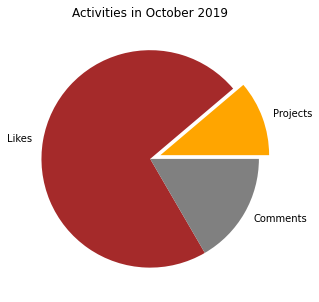

In [35]:
center()
plt.figure(figsize=(10,5))
labels = ['Projects', 
         'Likes',
         'Comments']
explode=(0.1,0, 0)
colors = ( "orange", "brown", "grey")
plt.pie(percentages,
        labels = labels,
       explode=explode,
       colors=colors) 
plt.title("Activities in October 2019")
plt.show()

`2` Top 10 Daily Active customers? <br>
This's a measure of stickyness and returntion

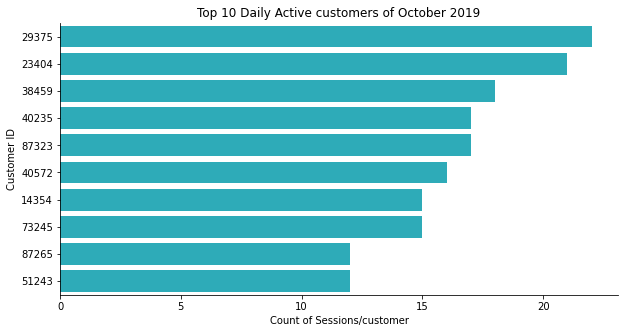

In [36]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[9]
top_DAU = (showwcase_df
           .customer_id
           .value_counts()[:10])

sns.barplot(y=top_DAU.index,
            x=top_DAU,
            color=base_color, 
            orient='h',
            order=top_DAU.index)
plt.xlabel('Count of Sessions/customer')
plt.ylabel('Customer ID')
plt.title('Top 10 Daily Active customers of October 2019')
sns.despine()

`3` Who spend longest time in each session?

In [37]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[6]
sns.barplot(x=top_longest_sessions_means['session_duration'],
            y=top_longest_sessions_means.index,
            color=base_color, 
            orient ='h',
            order = top_longest_sessions_means.index)
plt.xlabel("Average Sessions' lengths/customer")
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with longest average sessions\' lengths in October 2019')
sns.despine()

NameError: name 'top_longest_sessions_means' is not defined

<Figure size 720x360 with 0 Axes>

`4` Who spend longest inactive time in each session?

In [ ]:
center()
plt.figure(figsize=(10,5))
longest_inactive_sessions_means = (showwcase_df
                                   .groupby(['customer_id'])
                                   .mean()
                                   .sort_values('session_inactive_duration', ascending=False)['session_inactive_duration'][:10])

base_color = sns.color_palette()[8]
sns.barplot(x=longest_inactive_sessions_means,
            y=longest_inactive_sessions_means.index,
            color=base_color, 
            orient='h',
            order=longest_inactive_sessions_means.index)
plt.xlabel("Average Inactive Sessions' lengths/customer")
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with longest avarage inactive sessions lengths in October 2019')
sns.despine()

`5` Top engaging customers<br>
Given each activity a weight based on it's time consumption, as follows:<br>
1. Project: takes 5 points
2. Comment: takes 2 points
3. Like: takes 1 point

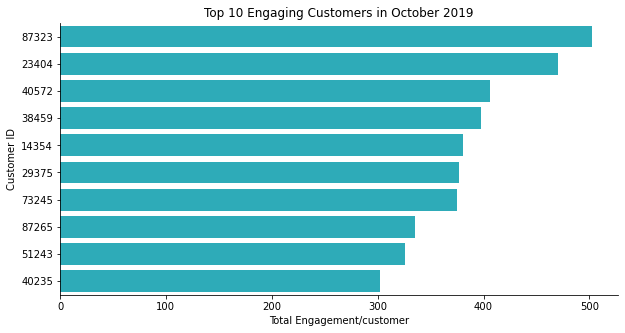

In [38]:
center()
plt.figure(figsize=(10,5))

project_weight = 5
comment_weight = 2
like_weight = 1

showwcase_df['session_total_engagement'] = ((showwcase_df['session_projects_added']*project_weight) +
                                            (showwcase_df['session_comments_given']*comment_weight) + 
                                            (showwcase_df['session_likes_given']*like_weight))
top_engaging_users = (showwcase_df
                      .groupby(showwcase_df['customer_id'])
                      .sum()
                      .sort_values('session_total_engagement',ascending=False)['session_total_engagement'][:10])

base_color = sns.color_palette()[9]
sns.barplot(x=top_engaging_users,
            y=top_engaging_users.index,
            color=base_color, 
            orient ='h',
            order = top_engaging_users.index)
plt.xlabel("Total Engagement/customer")
plt.ylabel('Customer ID')
plt.title('Top 10 Engaging Customers in October 2019')
sns.despine()

<h2>The platform has a champion!!🥇</h2> Customer with ID #29375 has been one of the top 10 active customers and one of the top 10 customers with longest avarage spending time in each session and one of the top 10 most engaging customers in October 2019<hr>

Charts showing that the top 10 most engaging customers (adding projects, comments and likes) are also the same top 10 active daily users

In [39]:
top_DAU.index.isin(top_engaging_users.index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

`6` How do these top customer engage most with the platform?

Text(0.5, 1.0, 'Top 10 Engaging Customers engaging with the platform in October 2019')

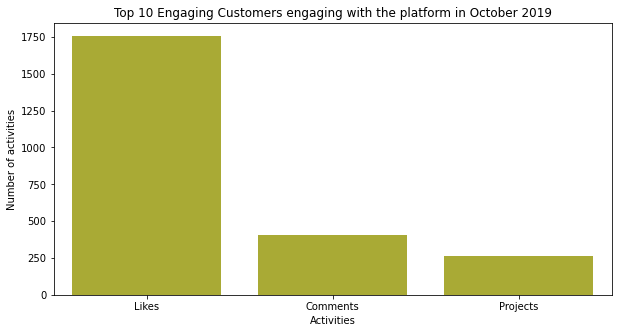

In [40]:
center()
plt.figure(figsize=(10,5))
top_engaging_users = (showwcase_df
                      .groupby(showwcase_df['customer_id'])
                      .sum()
                      .sort_values('session_total_engagement', ascending=False)[:10])
Project_total = top_engaging_users['session_projects_added'].sum()
Comments_total = top_engaging_users['session_comments_given'].sum()
Likes_total = top_engaging_users['session_likes_given'].sum()
totals=[Likes_total, Comments_total, Project_total]

labels = ['Likes', 'Comments', 'Projects']
base_color = sns.color_palette()[8]

sns.barplot(x=labels,
            y=totals,
            color=base_color) 

plt.xlabel("Activities")
plt.ylabel('Number of activities')
plt.title('Top 10 Engaging Customers engaging with the platform in October 2019')

`7` How many sessions were there each day in October 2019?

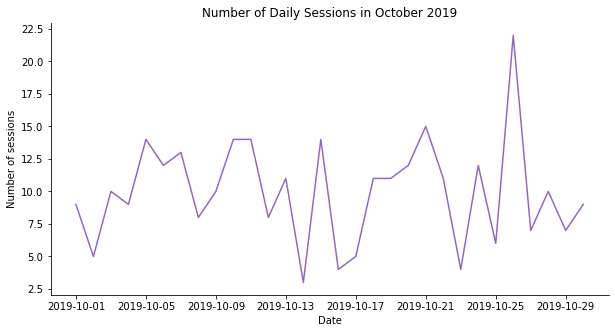

In [41]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[4]
most_common_login_dates = (showwcase_df
                           .groupby('login_date')
                           .count()
                           .sort_values('session_id', ascending=False)['session_id'])
sns.lineplot(data=showwcase_df,
             x=most_common_login_dates.index,
             y=most_common_login_dates.values,
             color=base_color,
             err_style=None)
plt.xlabel("Date")
plt.ylabel("Number of sessions")
plt.title('Number of Daily Sessions in October 2019')
sns.despine()

`8` What was the number of projects added each day during the month October 2019?

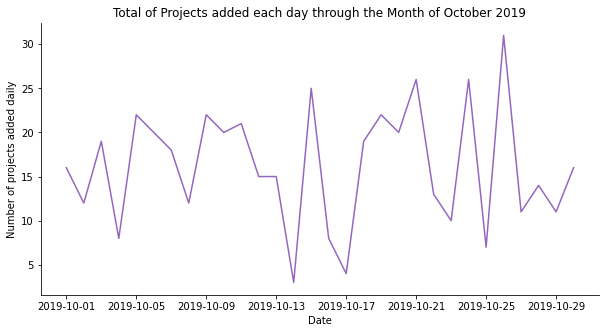

In [42]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[4]
projects_added_daily_sum = (showwcase_df
                            .groupby('login_date')
                            .sum()['session_projects_added'])
sns.lineplot(data=showwcase_df,
             x=projects_added_daily_sum.index,
             y=projects_added_daily_sum.values,
             color=base_color,
             err_style=None)
plt.xlabel("Date")
plt.ylabel("Number of projects added daily")
plt.title('Total of Projects added each day through the Month of October 2019')
sns.despine()

`9` What was the number of comments given each day during the month October 2019?

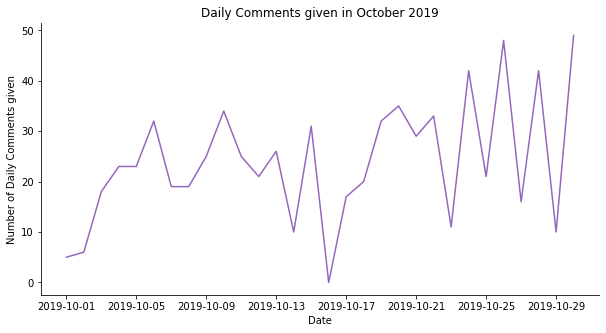

In [43]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[4]
most_common_login_dates = (showwcase_df
                           .groupby('login_date')
                           .sum()['session_comments_given'])
sns.lineplot(data=showwcase_df,
             x=most_common_login_dates.index,
             y=most_common_login_dates.values,
             color=base_color,
             err_style=None)
plt.xlabel("Date")
plt.ylabel("Number of Daily Comments given")
plt.title('Daily Comments given in October 2019')
sns.despine()

`10` What was the number of likes given each day during the month October 2019?

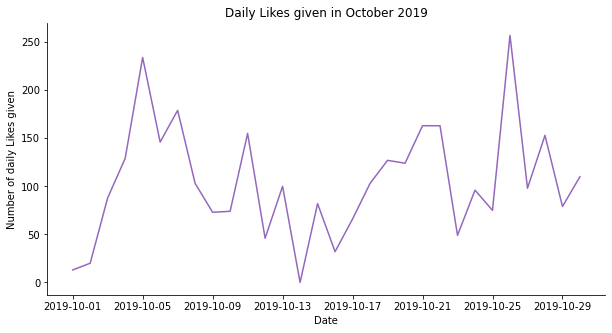

In [44]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[4]
most_common_login_dates = showwcase_df.groupby('login_date').sum()['session_likes_given']
sns.lineplot(data=showwcase_df,
             x=most_common_login_dates.index,
             y=most_common_login_dates.values,
             color=base_color,
             err_style=None)
plt.xlabel("Date")
plt.ylabel("Number of daily Likes given")
plt.title('Daily Likes given in October 2019')
sns.despine()

`11` How frequent was the Total Engagemnt throughout weekdays in October 2019?

In [45]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[9]
day_names = [calendar.day_name[i] for i in range(0,7)]
most_common_total_engagemnt_days = (showwcase_df
                                    .groupby(showwcase_df['login_date'].dt.weekday)
                                    .sum()
                                    .sort_values('total_engagement', ascending=False)['session_total_engagement'])
ax = sns.barplot(data=showwcase_df,
             x=most_common_total_engagemnt_days.index,
             y=most_common_total_engagemnt_days.values,
             color=base_color)
ax.set_xticklabels(day_names)
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.title('Total engagement given throughout the weekdays in October 2019')
sns.despine()

KeyError: 'total_engagement'

<Figure size 720x360 with 0 Axes>

`12` How frequent were logins throughout weekdays during the month of October 2019?

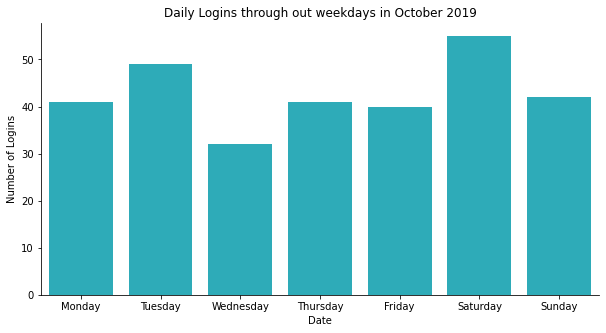

In [46]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[9]
day_names = [calendar.day_name[i] for i in range(0,7)]
most_common_login_dates = (showwcase_df
                           .groupby(showwcase_df['login_date'].dt.weekday)
                           .count()
                           .sort_values('session_id', ascending=False)['session_id'])
ax = sns.barplot(data=showwcase_df,
             x=most_common_login_dates.index,
             y=most_common_login_dates.values,
             color=base_color)
ax.set_xticklabels(day_names)
plt.xlabel("Date")
plt.ylabel("Number of Logins")
plt.title('Daily Logins through out weekdays in October 2019')
sns.despine()

`13` How frequent was adding projects during weekdays during October 2019?

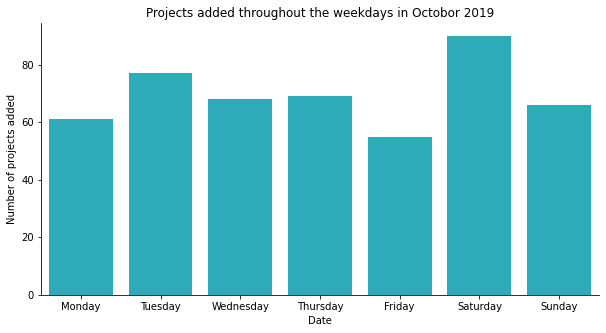

In [47]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[9]
day_names = [calendar.day_name[i] for i in range(0,7)]
most_common_project_adding_days = (showwcase_df
                                   .groupby(showwcase_df['login_date'].dt.weekday)
                                   .sum()
                                   .sort_values('session_projects_added', ascending=False)['session_projects_added'])
ax = sns.barplot(data=showwcase_df,
             x=most_common_project_adding_days.index,
             y=most_common_project_adding_days.values,
             color=base_color)
ax.set_xticklabels(day_names)
plt.xlabel("Date")
plt.ylabel("Number of projects added")
plt.title('Projects added throughout the weekdays in Octobor 2019')
sns.despine()

`14` How frequent is giving comments during the weekdays during October 2019?

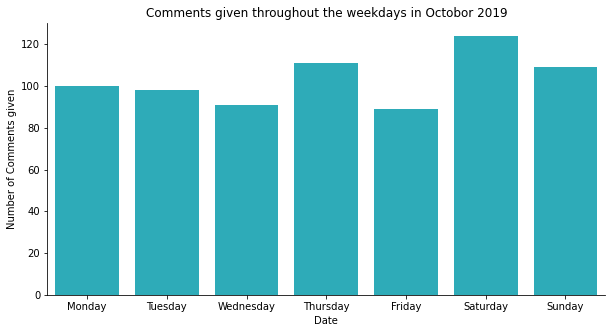

In [48]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[9]
day_names = [calendar.day_name[i] for i in range(0,7)]
most_common_likes_given_days = (showwcase_df
                                .groupby(showwcase_df['login_date'].dt.weekday)
                                .sum()
                                .sort_values('session_comments_given', ascending=False)['session_comments_given'])
ax = sns.barplot(data=showwcase_df,
             x=most_common_likes_given_days.index,
             y=most_common_likes_given_days.values,
             color=base_color)
ax.set_xticklabels(day_names)
plt.xlabel("Date")
plt.ylabel("Number of Comments given")
plt.title('Comments given throughout the weekdays in Octobor 2019')
sns.despine()

`15` How frequent was giving likes during the weekdays during October 2019?

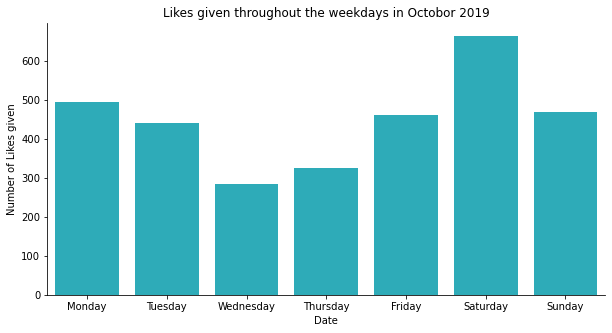

In [49]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[9]
day_names = [calendar.day_name[i] for i in range(0,7)]
most_common_likes_given_days = (showwcase_df
                                .groupby(showwcase_df['login_date'].dt.weekday)
                                .sum()
                                .sort_values('session_likes_given', ascending=False)['session_likes_given'])
ax = sns.barplot(data=showwcase_df,
             x=most_common_likes_given_days.index,
             y=most_common_likes_given_days.values,
             color=base_color)
ax.set_xticklabels(day_names)
plt.xlabel("Date")
plt.ylabel("Number of Likes given")
plt.title('Likes given throughout the weekdays in Octobor 2019')
sns.despine()

`16` How many bugs were there each day during October 2019?

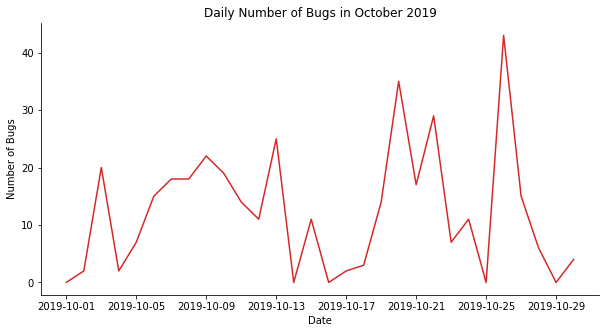

In [50]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[3]
bugs_days = showwcase_df.groupby('login_date').sum()['session_bugs_occured']
sns.lineplot(data=showwcase_df,
             x=bugs_days.index,
             y=bugs_days.values,
             color=base_color,
             err_style=None)
plt.xlabel("Date")
plt.ylabel("Number of Bugs")
plt.title('Daily Number of Bugs in October 2019')
sns.despine()

It's quite clear that the platform encountered the highest bugs on the 26th of October.
The inconsistancy in row #35 we saw earlier when the session_likes_given=NaN is might be one of these bugs occured because it was also on the 26th October.

`17` How frequent bugs were there throughout weekdays during October 2019?

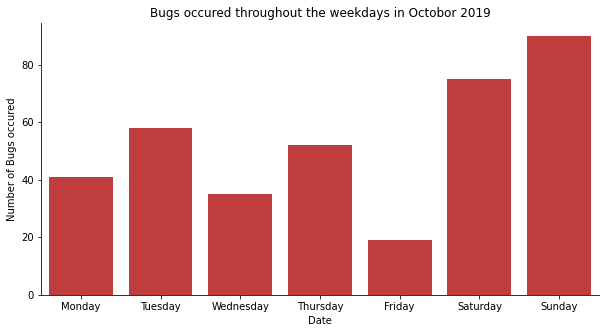

In [51]:
center()
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[3]
day_names = [calendar.day_name[i] for i in range(0,7)]
most_common_bugs_occured_days = (showwcase_df
                                 .groupby(showwcase_df['login_date'].dt.weekday)
                                 .sum()
                                 .sort_values('session_bugs_occured', ascending=False)['session_bugs_occured'])
ax = sns.barplot(data=showwcase_df,
             x=most_common_bugs_occured_days.index,
             y=most_common_bugs_occured_days.values,
             color=base_color)
ax.set_xticklabels(day_names)
plt.xlabel("Date")
plt.ylabel("Number of Bugs occured")
plt.title('Bugs occured throughout the weekdays in Octobor 2019')
sns.despine()

`18` How do users add their projects (1-2 per session, or >2 per session)?

based on the fact that the mean time for the session is 3.29hours. I would assume that a normal person can write one new project or two at max in each session.
It seems from looking at the data, that many users are adding more than 3 projects in each session.
This may indicate that the users are not using the editor to write new projects but rather copy and paste older projects.
More investegations can be done to look at this point

In [52]:
showwcase_df.groupby(['customer_id','login_date']).sum()

session_projects_added  session_likes_given  \
customer_id login_date                                                
10246       2019-10-06                       3                   16   
            2019-10-15                       0                   14   
            2019-10-21                       5                   23   
12407       2019-10-02                       3                    0   
            2019-10-17                       2                   22   
...                                        ...                  ...   
98653       2019-10-15                       3                    0   
            2019-10-20                       1                    2   
            2019-10-21                       4                    0   
            2019-10-25                       2                   18   
            2019-10-29                       0                    0   

                        session_comments_given  session_inactive_duration  \
customer_id login_date                                                      
10246       2019-10-06                       3                        315   
            2019-10-15                       0                          0   
            2019-10-21                       0                       2120   
12407       2019-10-02                       0                       1749   
            2019-10-17                       5                          0   
...                                        ...                        ...   
98653       2019-10-15                       0                       2350   
            2019-10-20                       4                          0   
            2019-10-21                       5                       1289   
            2019-10-25                       0                          0   
            2019-10-29                       1                        930   

                        session_bugs_occured  session_duration  \
customer_id login_date                                           
10246       2019-10-06                     2               389   
            2019-10-15                     0              2075   
            2019-10-21                     7               399   
12407       2019-10-02                     0               464   
            2019-10-17                     0              2060   
...                                      ...               ...   
98653       2019-10-15                     3               272   
            2019-10-20                     0                55   
            2019-10-21                     2               857   
            2019-10-25                     0              1152   
            2019-10-29                     0              1374   

                        session_total_engagement  
customer_id login_date                            
10246       2019-10-06                        37  
            2019-10-15                        14  
            2019-10-21                        48  
12407       2019-10-02                        15  
            2019-10-17                        42  
...                                          ...  
98653       2019-10-15                        15  
            2019-10-20                        15  
            2019-10-21                        30  
            2019-10-25                        28  
            2019-10-29                         2  

[260 rows x 7 columns]